In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_recovered.csv


In [2]:
cov_data = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv", index_col=0)
cov_deaths = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_deaths.csv")
cov_confirmed = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_confirmed.csv")
cov_recovered = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_2019_ncov_recovered.csv")
cov_data.head()

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [3]:
cov_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,...,02/05/20 9:00,02/05/20 23:00,02/06/20 9:00,02/06/20 14:20,02/07/20 20:13,02/07/20 22:50,02/08/20 22:04,02/08/20 23:04,02/09/20 10:30,02/09/20 23:20
0,Anhui,Mainland China,31.82571,117.2264,NaN,1.0,9.0,15.0,15.0,39.0,...,530.0,591.0,591.0,591.0,665,733,733,779,779,830
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,...,253.0,274.0,274.0,274.0,297,315,315,326,326,337
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,...,376.0,389.0,400.0,400.0,415,426,428,446,450,468
3,Fujian,Mainland China,26.07783,117.9895,NaN,1.0,5.0,5.0,10.0,10.0,...,205.0,215.0,215.0,215.0,224,239,239,250,250,261
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,2.0,2.0,2.0,4.0,...,57.0,62.0,62.0,62.0,67,71,79,79,79,83


In [4]:
cov_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/21/20 22:00',
       '1/22/20 12:00', '1/23/20 12:00', '1/24/20 0:00', '1/24/20 12:00',
       '1/25/20 0:00', '1/25/20 12:00', '1/25/20 22:00', '1/26/20 11:00',
       '1/26/20 23:00', '1/27/20 9:00', '1/27/20 19:00', '1/27/20 20:30',
       '1/28/20 13:00', '1/28/20 18:00', '1/28/20 23:00', '1/29/20 13:30',
       '1/29/20 14:30', '1/29/20 21:00', '1/30/20 11:00', '1/31/20 14:00',
       '02/01/20 10:00', '02/02/20 21:00', '02/03/20 21:00', '02/04/20 9:40',
       '02/04/20 22:00', '02/05/20 9:00', '02/05/20 23:00', '02/06/20 9:00',
       '02/06/20 14:20', '02/07/20 20:13', '02/07/20 22:50', '02/08/20 22:04',
       '02/08/20 23:04', '02/09/20 10:30', '02/09/20 23:20'],
      dtype='object')

In [5]:
cov_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1419 entries, 1 to 1419
Data columns (total 7 columns):
Date              1419 non-null object
Province/State    1045 non-null object
Country           1419 non-null object
Last Update       1419 non-null object
Confirmed         1419 non-null float64
Deaths            1419 non-null float64
Recovered         1419 non-null float64
dtypes: float64(3), object(4)
memory usage: 88.7+ KB


In [6]:
cov_data.describe()

,Confirmed,Deaths,Recovered
count,1419.000000,1419.000000,1419.000000
mean,353.098661,7.837914,24.916843
std,2748.467305,79.170874,187.054125
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,11.000000,0.000000,0.000000
75%,95.000000,0.000000,4.000000
max,51986.000000,1426.000000,4131.000000


In [7]:
nRows, nCols = cov_data.shape
print(f'There are {nRows} rows and {nCols} columns')

There are 1419 rows and 7 columns


In [8]:
cov_data.columns

Index(['Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


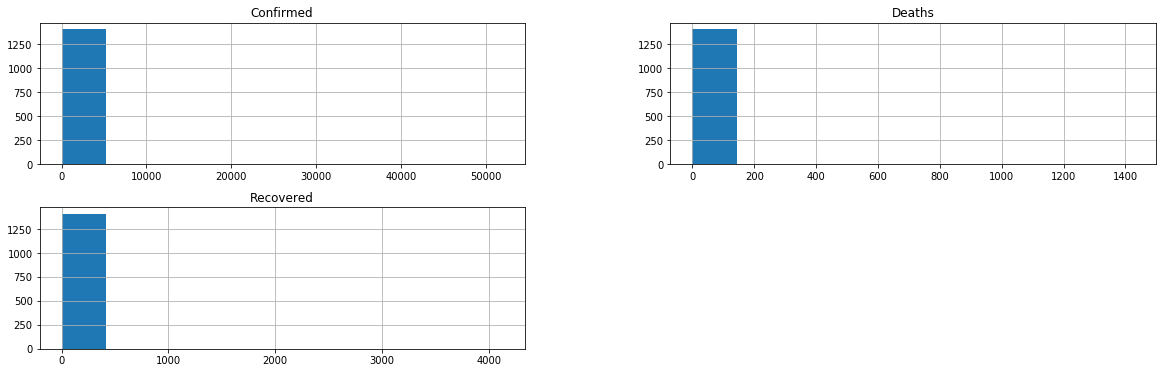

In [9]:
fig = plt.figure(figsize=(20,6))
ax_data = fig.gca()
cov_data.hist(ax=ax_data)
plt.style.use("ggplot")

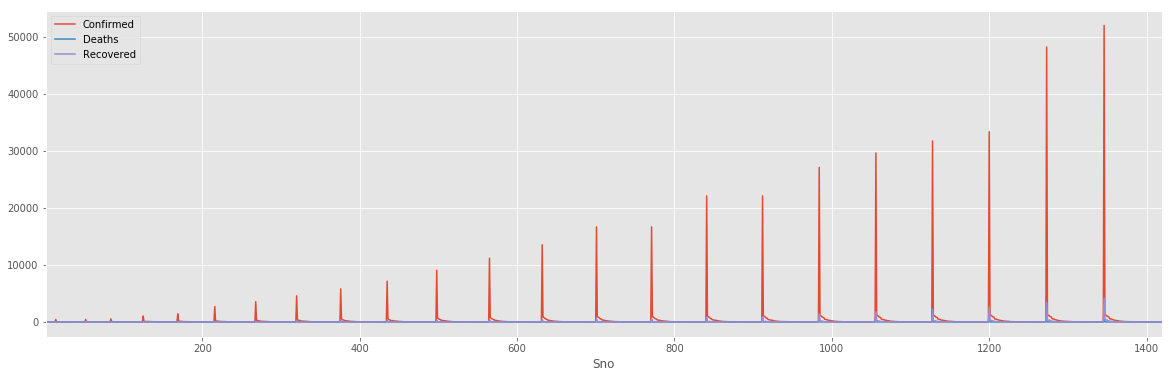

In [10]:
cov_data.plot(figsize=(20,6))

**List of affected provinces/states**

In [11]:
cov_data['Province/State'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Taiwan',
       'Tianjin', 'Tibet', 'Washington', 'Xinjiang', 'Yunnan', 'Zhejiang',
       nan, 'Chicago', 'Illinois', 'California', 'Arizona', 'Ontario',
       'New South Wales', 'Victoria', 'Bavaria', 'British Columbia',
       'Queensland', 'Chicago, IL', 'South Australia', 'Boston, MA',
       'Los Angeles, CA', 'Orange, CA', 'Santa Clara, CA', 'Seattle, WA',
       'Tempe, AZ', 'Toronto, ON', 'San Benito, CA', 'London, ON',
       'Madison, WI', 'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'San Antonio, TX'], dtype=object)

In [12]:
cov_data['Province/State'].nunique()

61

**List of affected country**

In [13]:
cov_data['Province/State'].value_counts()

Gansu                           23
Beijing                         23
Macau                           23
Jiangxi                         23
Inner Mongolia                  23
                                ..
Diamond Princess cruise ship     5
San Diego County, CA             3
Cruise Ship                      2
Chicago                          1
San Antonio, TX                  1
Name: Province/State, Length: 61, dtype: int64

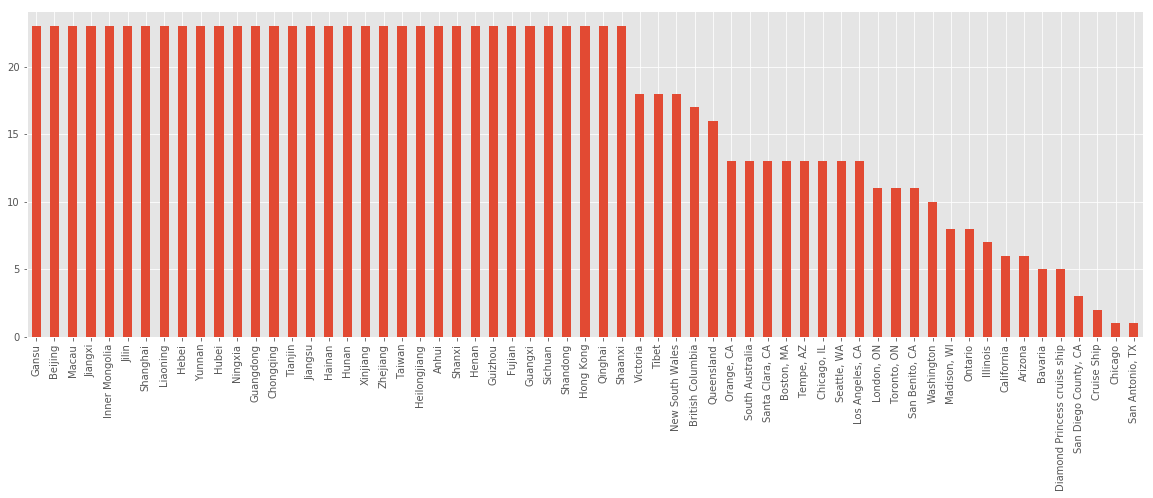

In [14]:
plt.figure(figsize=(20,6))
cov_data['Province/State'].value_counts().plot.bar()

In [15]:
cov_data['Country'].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium',
       'Others'], dtype=object)

In [16]:
cov_data['Country'].nunique()

33

In [17]:
cov_data['Country'].value_counts()

Mainland China          677
US                      144
Australia                68
Canada                   47
China                    34
South Korea              23
Japan                    23
Thailand                 23
Macau                    22
Hong Kong                22
Singapore                22
Vietnam                  22
Taiwan                   22
France                   21
Malaysia                 21
Nepal                    20
Germany                  18
Sri Lanka                18
Cambodia                 18
United Arab Emirates     16
Philippines              16
Finland                  16
India                    15
Italy                    15
UK                       14
Russia                   14
Sweden                   14
Spain                    14
Belgium                  10
Others                    7
Ivory Coast               1
Brazil                    1
Mexico                    1
Name: Country, dtype: int64

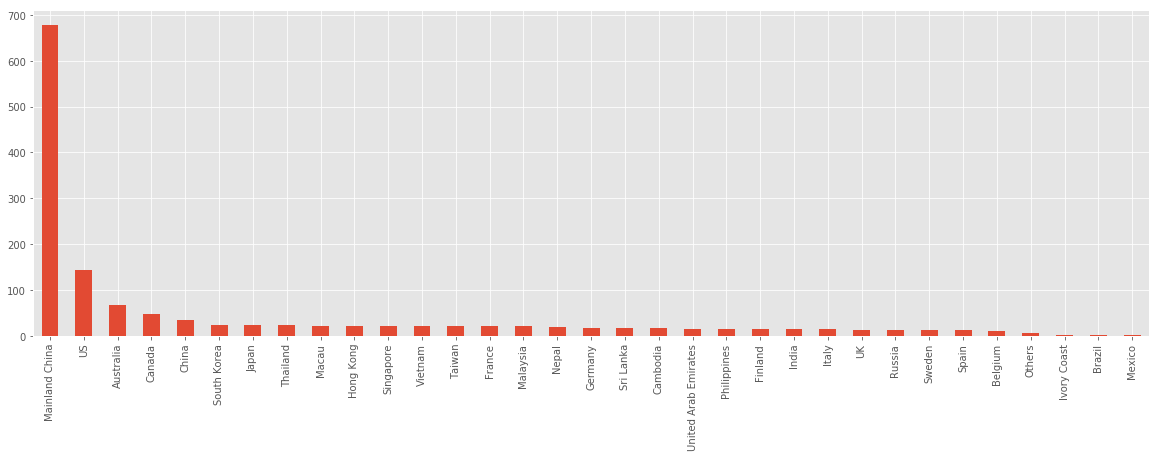

In [18]:
plt.figure(figsize=(20,6))
cov_data['Country'].value_counts().plot.bar()

**Number of cases in each Province/State**

In [19]:
p_data = cov_data.groupby("Province/State").max()
p_data = p_data.sort_values("Confirmed", ascending=False)
p_data.head(20)

,Date,Country,Last Update,Confirmed,Deaths,Recovered
Province/State,,,,,,
Hubei,02/13/2020 21:15:00,Mainland China,2020-09-02 03:03:00,51986.0,1426.0,4131.0
Guangdong,02/13/2020 21:15:00,Mainland China,2020-09-02 01:53:00,1261.0,2.0,332.0
Henan,02/13/2020 21:15:00,Mainland China,2020-09-02 01:13:00,1184.0,11.0,313.0
Zhejiang,02/13/2020 21:15:00,Mainland China,2020-09-02 03:03:00,1155.0,0.0,367.0
Hunan,02/13/2020 21:15:00,Mainland China,2020-09-02 01:13:00,988.0,2.0,352.0
Anhui,02/13/2020 21:15:00,Mainland China,2020-09-02 01:23:00,934.0,6.0,166.0
Jiangxi,02/13/2020 21:15:00,Mainland China,2020-09-02 01:23:00,900.0,1.0,187.0
Jiangsu,02/13/2020 21:15:00,Mainland China,2020-09-02 03:33:00,593.0,0.0,137.0
Chongqing,02/13/2020 21:15:00,Mainland China,2020-09-02 00:43:00,529.0,4.0,128.0


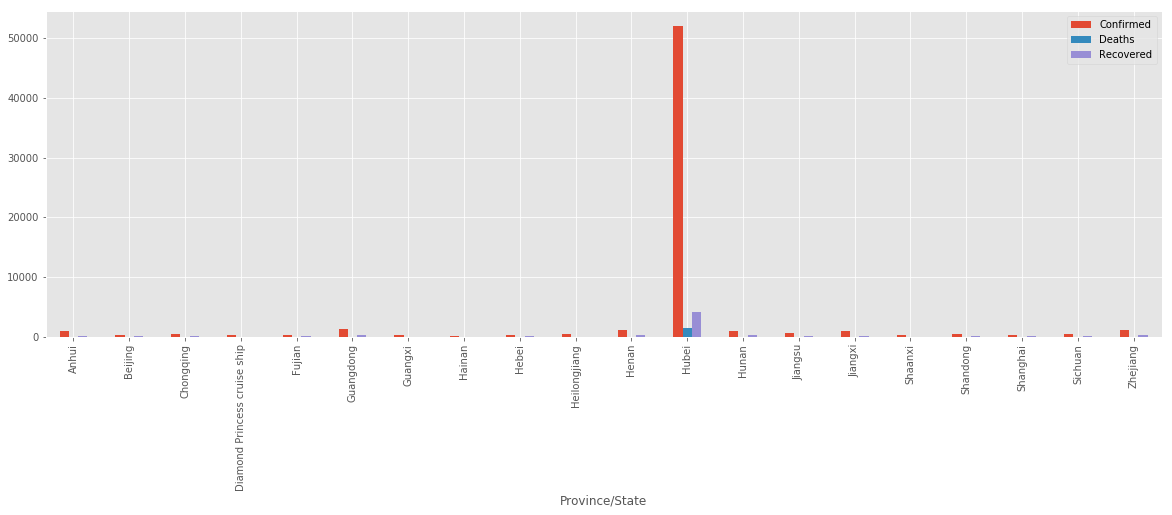

In [20]:
p_data.head(20).groupby("Province/State").max().plot.bar(figsize=(20,6))

In [21]:
c1_data = p_data.groupby("Country").sum()
c1_data = c1_data.sort_values("Confirmed", ascending=False)
c1_data

,Confirmed,Deaths,Recovered
Country,,,
Mainland China,63841.0,1489.0,6982.0
Others,279.0,0.0,0.0
Hong Kong,53.0,1.0,1.0
US,23.0,0.0,3.0
Taiwan,18.0,0.0,1.0
Australia,15.0,0.0,8.0
Canada,10.0,0.0,1.0
Macau,10.0,0.0,3.0
Germany,7.0,0.0,0.0


In [22]:
print("Start Date: ", cov_data["Date"].min())
print("Final Date: ", cov_data["Date"].max())

Start Date:  01/22/2020 12:00:00
Final Date:  02/13/2020 21:15:00


In [23]:
cov_data["Date"].value_counts().sort_index()

01/22/2020 12:00:00    38
01/23/2020 12:00:00    45
01/24/2020 12:00:00    41
01/25/2020 22:00:00    44
01/26/2020 23:00:00    47
01/27/2020 20:30:00    52
01/28/2020 23:00:00    52
01/29/2020 21:00:00    56
01/30/2020 21:30:00    59
01/31/2020 19:00:00    63
02/01/2020 23:00:00    67
02/02/2020 21:00:00    67
02/03/2020 21:40:00    69
02/04/2020 22:00:00    70
02/05/2020 12:20:00    70
02/06/2020 20:05:00    71
02/07/2020 20:24:00    72
02/08/2020 23:04:00    72
02/09/2020 23:20:00    72
02/10/2020 19:30:00    72
02/11/2020 20:44:00    73
02/12/2020 22:00:00    73
02/13/2020 21:15:00    74
Name: Date, dtype: int64

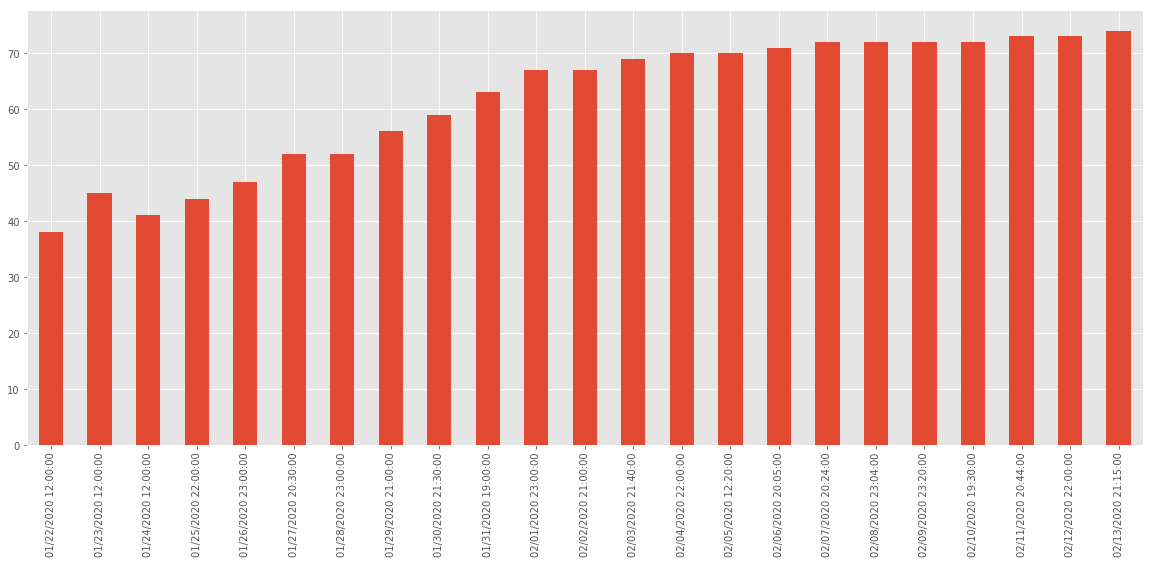

In [24]:
cov_data["Date"].value_counts().sort_index().plot.bar(figsize=(20,8))

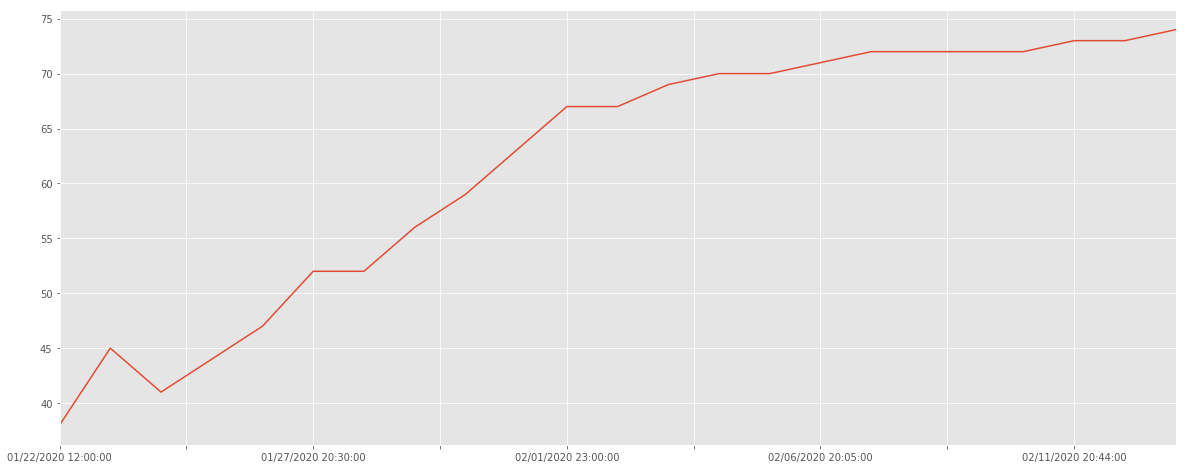

In [25]:
cov_data["Date"].value_counts().sort_index().plot.line(figsize=(20,8))

In [26]:
print("Number of Affected : ",cov_data["Confirmed"].sum())
print("Number of Deaths : ",cov_data["Deaths"].sum())
print("Number of Recovered : ",cov_data["Recovered"].sum())

Number of Affected :  501047.0
Number of Deaths :  11122.0
Number of Recovered :  35357.0
